### Binarisation

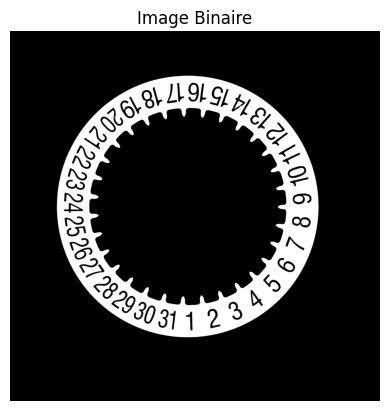

(100.0,
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8))

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#binarisé l'image
def binarize_image(image_path, threshold=100):
    # Charger l'image en niveaux de gris
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    if image is None:
        raise ValueError("L'image n'a pas pu être chargée. Vérifiez le chemin du fichier.")
    
    # Appliquer le seuillage pour binariser l'image
    binary_image = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)

    # Afficher l'image binaire jupiter
    plt.imshow(binary_image[1], cmap='gray')
    plt.title('Image Binaire')
    plt.axis('off')
    plt.show()
    return binary_image

# Exemple d'utilisation
binarize_image('data/clean_image/30mm_BonW_7.jpg', threshold=100)



### Détection des rectangles autours des ROIS 

In [6]:
import cv2

# Variables globales
drawing = False
start_point = ()
rectangles = []

original_image = cv2.imread("data/clean_image/30mm_BonW_7.jpg")
orig_height, orig_width = original_image.shape[:2]

#largeur d'affichage maximale
max_display_width = 800
scale = max_display_width / orig_width
display_image = cv2.resize(original_image, (int(orig_width * scale), int(orig_height * scale)))
display_image_copy = display_image.copy()

def draw_rectangle(event, x, y, flags, param):
    global drawing, start_point, rectangles, display_image_copy
    
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        start_point = (x, y)
        
    elif event == cv2.EVENT_MOUSEMOVE and drawing:
        display_image_copy = display_image.copy()
        # Redessiner tous les rectangles existants
        for rect in rectangles:
            # Convertir les coordonnées originales vers l'affichage
            x1_display = int(rect['x'] * scale)
            y1_display = int(rect['y'] * scale)
            x2_display = int((rect['x'] + rect['width']) * scale)
            y2_display = int((rect['y'] + rect['height']) * scale)
            cv2.rectangle(display_image_copy, (x1_display, y1_display), (x2_display, y2_display), (0, 255, 0), 2)
        # Dessiner le rectangle en cours
        cv2.rectangle(display_image_copy, start_point, (x, y), (0, 255, 0), 2)
        
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        end_point = (x, y)
        
        # Redimensionnement des coordonnées vers l'image originale
        x1 = int(min(start_point[0], end_point[0]) / scale)
        y1 = int(min(start_point[1], end_point[1]) / scale)
        x2 = int(max(start_point[0], end_point[0]) / scale)
        y2 = int(max(start_point[1], end_point[1]) / scale)
        
        rect = {
            'x': x1,
            'y': y1,
            'width': x2 - x1,
            'height': y2 - y1
        }
        rectangles.append(rect)
        
        # Afficher immédiatement la nouvelle position
        print(f"Rectangle {len(rectangles)} ajouté: {rect}")
        
        # Mettre à jour l'image d'affichage avec tous les rectangles
        display_image_copy = display_image.copy()
        for i, r in enumerate(rectangles, 1):
            # Convertir les coordonnées originales vers l'affichage
            x1_display = int(r['x'] * scale)
            y1_display = int(r['y'] * scale)
            x2_display = int((r['x'] + r['width']) * scale)
            y2_display = int((r['y'] + r['width']) * scale)
            cv2.rectangle(display_image_copy, (x1_display, y1_display), (x2_display, y2_display), (0, 255, 0), 2)
            # Ajouter le numéro du rectangle
            cv2.putText(display_image_copy, str(i), (x1_display, y1_display-5), 
                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

# Création de la fenêtre
cv2.namedWindow("Dessine autour des chiffres - 's' pour finir", cv2.WINDOW_AUTOSIZE)
cv2.setMouseCallback("Dessine autour des chiffres - 's' pour finir", draw_rectangle)

print("Instructions:")
print("- Cliquez et glissez pour dessiner un rectangle")
print("- Chaque rectangle sera affiché immédiatement avec ses coordonnées")
print("- Appuyez sur 's' pour terminer")
print("- Appuyez sur 'q' pour annuler et quitter")
print("- Appuyez sur 'r' pour effacer tous les rectangles")
print("\nCommencez à dessiner...")

# Boucle principale
while True:
    cv2.imshow("Dessine autour des chiffres - 's' pour finir", display_image_copy)
    key = cv2.waitKey(1) & 0xFF
    
    if key == ord('s'):
        print(f"\nTerminé! {len(rectangles)} rectangles sauvegardés.")
        break
    elif key == ord('q'):
        rectangles = []
        print("\nAnnulé.")
        break
    elif key == ord('r'):
        # Effacer tous les rectangles
        rectangles = []
        display_image_copy = display_image.copy()
        print("\nTous les rectangles effacés.")

cv2.destroyAllWindows()

# Résultat final
print("\n" + "="*50)
print("RÉSUMÉ - Rectangles dessinés (coordonnées originales):")
print("="*50)
for i, rect in enumerate(rectangles, 1):
    print(f"Rectangle {i}: x={rect['x']}, y={rect['y']}, largeur={rect['width']}, hauteur={rect['height']}")

if rectangles:
    print(f"\nTotal: {len(rectangles)} rectangles détectés")
    # Optionnel: sauvegarder dans un fichier
    print("\nListe Python des rectangles:")
    print("rectangles =", rectangles)
else:
    print("\nAucun rectangle sauvegardé.")

Instructions:
- Cliquez et glissez pour dessiner un rectangle
- Chaque rectangle sera affiché immédiatement avec ses coordonnées
- Appuyez sur 's' pour terminer
- Appuyez sur 'q' pour annuler et quitter
- Appuyez sur 'r' pour effacer tous les rectangles

Commencez à dessiner...

Annulé.

RÉSUMÉ - Rectangles dessinés (coordonnées originales):

Aucun rectangle sauvegardé.


### Affichage des ROIS extraite

Extraction des régions d'intérêt...
ROI  1: Position(2060,3366) Taille(248×355) → Extrait(248×355)
ROI  2: Position(2358,3344) Taille(259×315) → Extrait(259×315)
ROI  3: Position(2617,3282) Taille(265×309) → Extrait(265×309)
ROI  4: Position(2820,3152) Taille(304×265) → Extrait(304×265)
ROI  5: Position(2967,2944) Taille(343×287) → Extrait(343×287)
ROI  6: Position(3220,2679) Taille(298×316) → Extrait(298×316)
ROI  7: Position(3316,2409) Taille(292×327) → Extrait(292×327)
ROI  8: Position(3361,2184) Taille(337×225) → Extrait(337×225)
ROI  9: Position(3349,1942) Taille(361×191) → Extrait(361×191)
ROI 10: Position(3316,1610) Taille(343×304) → Extrait(343×304)
ROI 11: Position(3265,1317) Taille(304×338) → Extrait(304×338)
ROI 12: Position(3085,1069) Taille(332×349) → Extrait(332×349)
ROI 13: Position(2854, 867) Taille(355×360) → Extrait(355×360)
ROI 14: Position(2662, 686) Taille(305×372) → Extrait(305×372)
ROI 15: Position(2409, 641) Taille(282×355) → Extrait(282×355)
ROI 16: Position(21

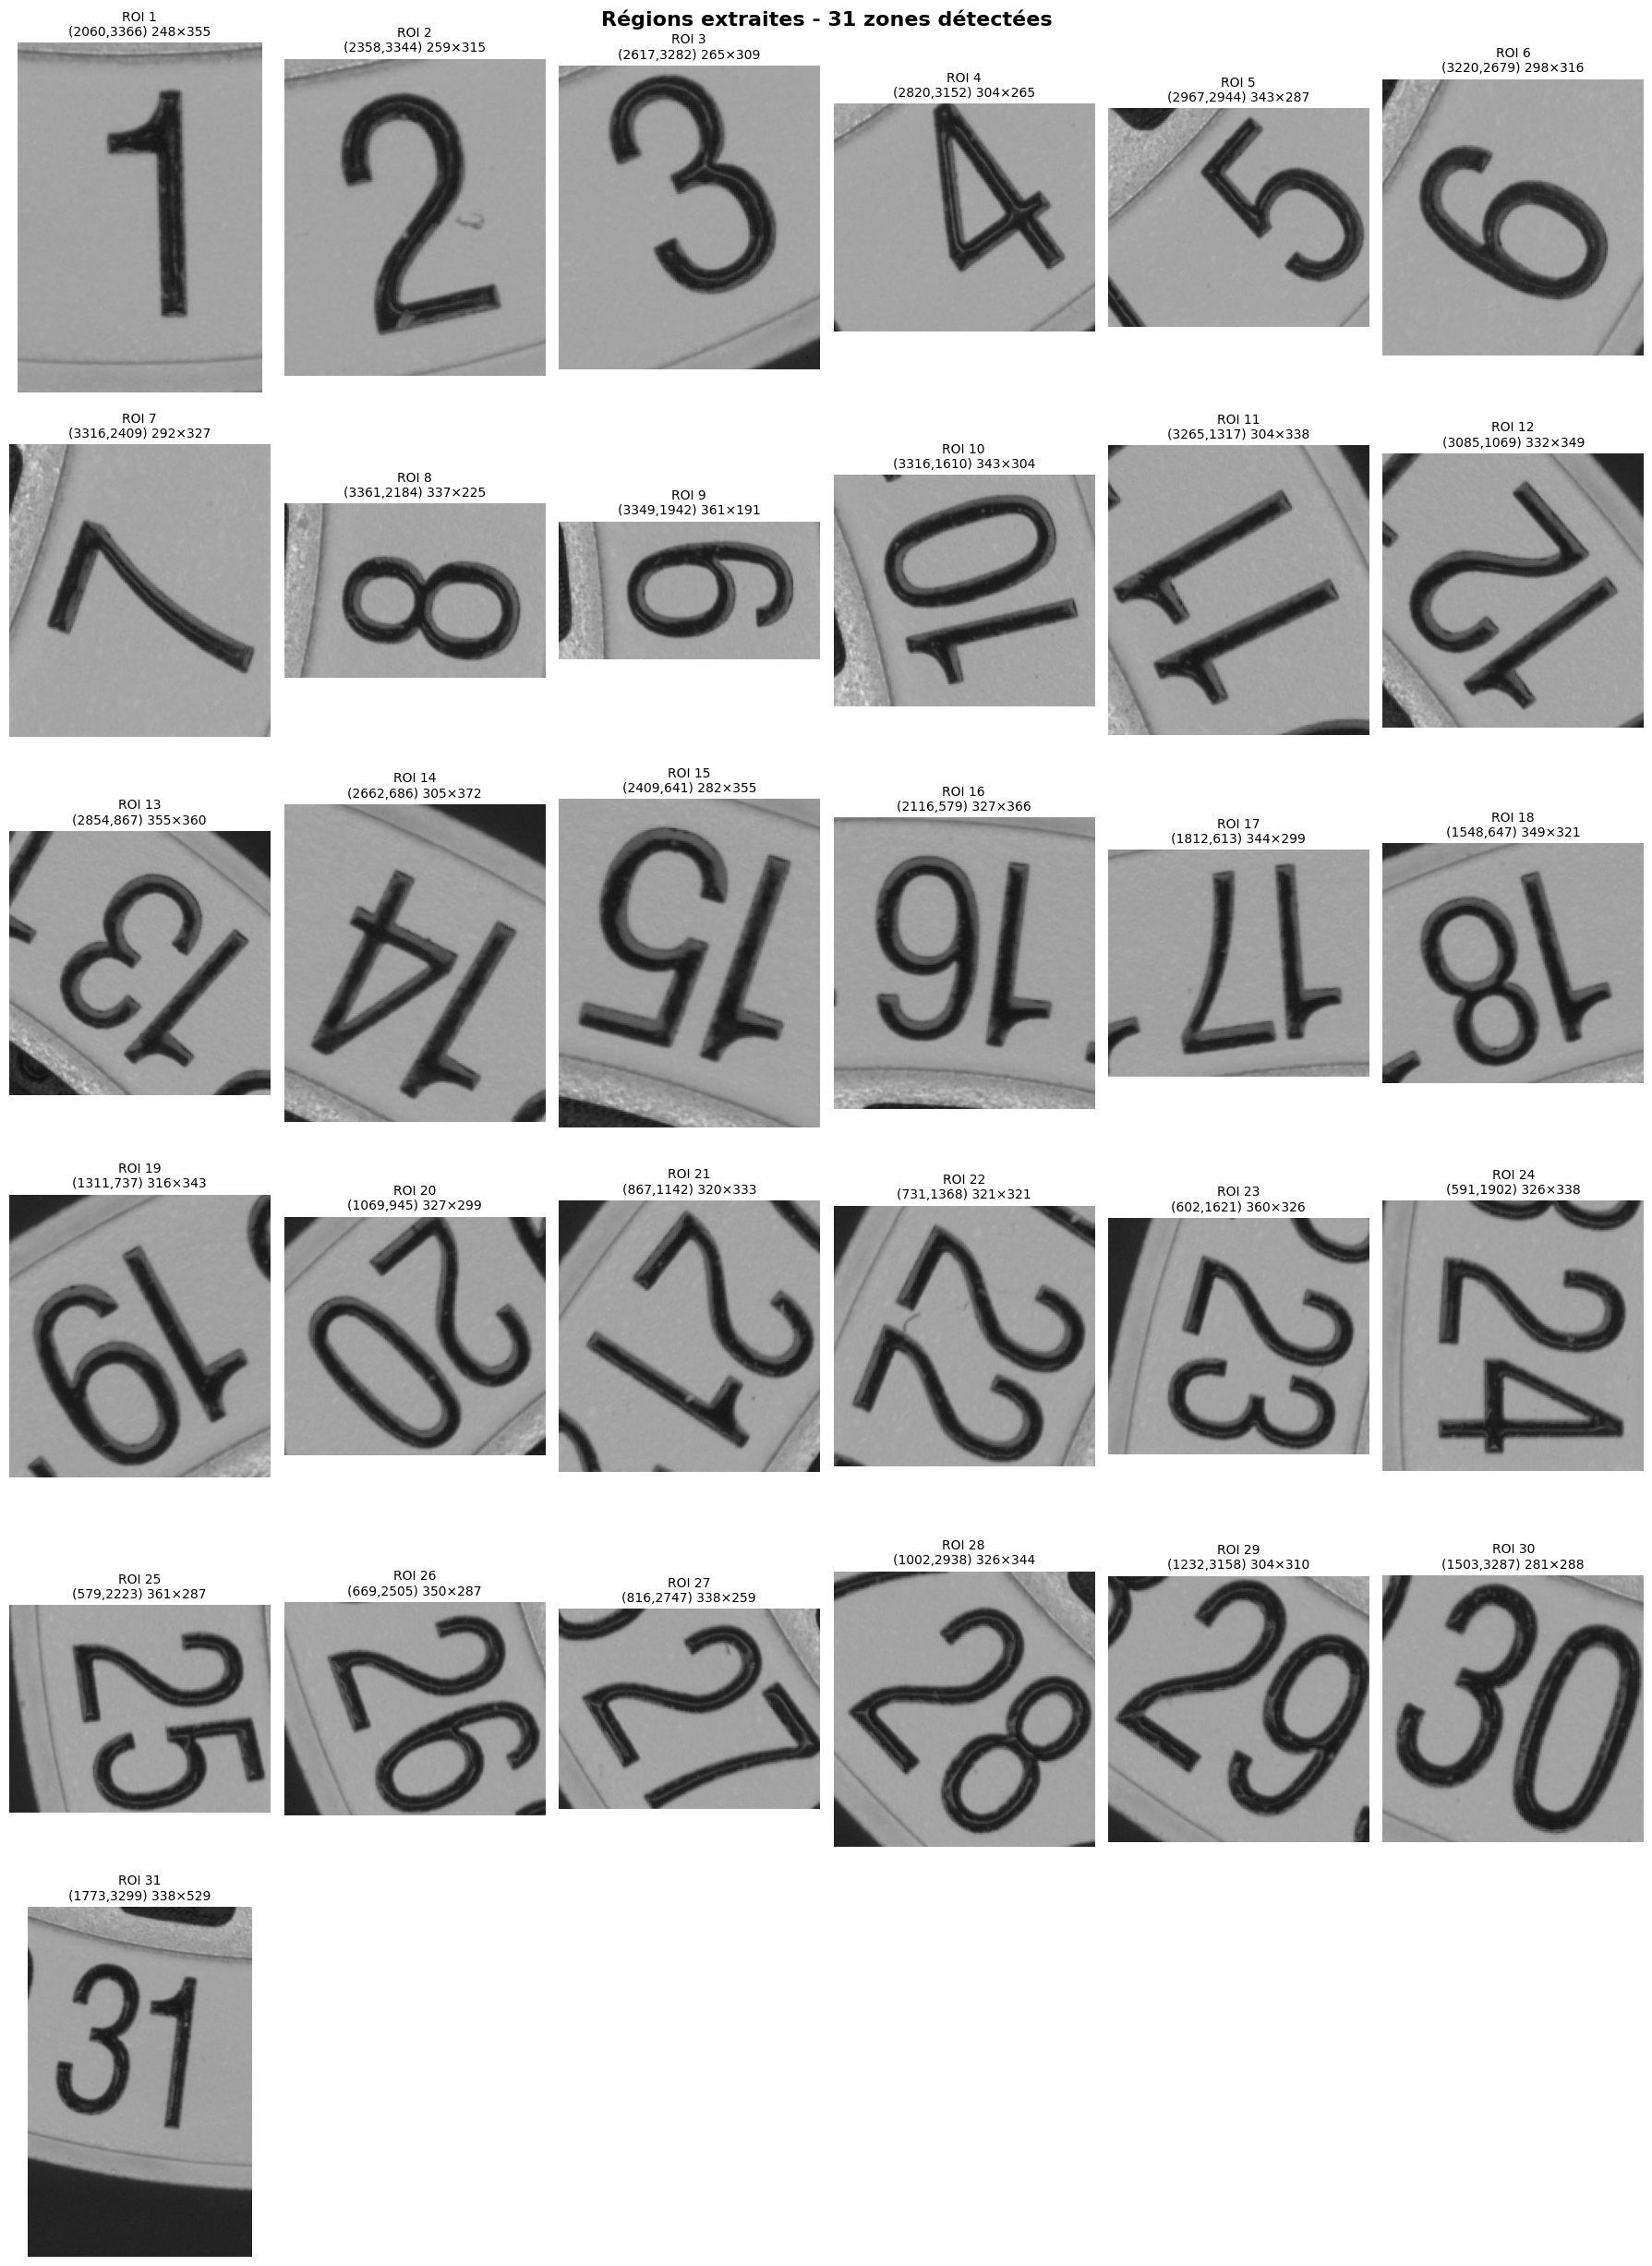

In [16]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def extract_and_display_regions(rectangles, image_path, cols=5, figsize=(15, 20)):

    image = cv2.imread(image_path)
    if image is None:
        print(f"Erreur: Impossible de charger l'image '{image_path}'")
        return
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Calcule du nombre de lignes nécessaires
    rows = (len(rectangles) + cols - 1) // cols
    
    # Creation de la figure
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    fig.suptitle(f'Régions extraites - {len(rectangles)} zones détectées', fontsize=16, fontweight='bold')
    
    # S'assurer que axes est toujours un tableau 2D
    if rows == 1:
        axes = axes.reshape(1, -1)
    elif cols == 1:
        axes = axes.reshape(-1, 1)
    
    # Extraire et afficher chaque région
    for i, rect in enumerate(rectangles):
        row = i // cols
        col = i % cols
        
        # Extraction de  la région
        x, y, w, h = rect['x'], rect['y'], rect['width'], rect['height']
        
        # Vérifier les limites de l'image
        x = max(0, x)
        y = max(0, y)
        x_end = min(image_rgb.shape[1], x + w)
        y_end = min(image_rgb.shape[0], y + h)
        
        # Extraire la région d'intérêt
        roi = image_rgb[y:y_end, x:x_end]
        
        # Afficher la région
        ax = axes[row, col]
        ax.imshow(roi)
        ax.set_title(f'ROI {i+1}\n({x},{y}) {w}×{h}', fontsize=10)
        ax.axis('off')
        
        # Afficher les dimensions de la région extraite
        print(f"ROI {i+1:2d}: Position({x:4d},{y:4d}) Taille({w:3d}×{h:3d}) → Extrait({roi.shape[1]:3d}×{roi.shape[0]:3d})")
    
    # Masquer les axes inutilisés
    total_plots = rows * cols
    for i in range(len(rectangles), total_plots):
        row = i // cols
        col = i % cols
        axes[row, col].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    return fig

def extract_regions_as_array(rectangles, image_path):

    image = cv2.imread(image_path)
    if image is None:
        print(f"Erreur: Impossible de charger l'image '{image_path}'")
        return []
    
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    regions = []
    
    for i, rect in enumerate(rectangles):
        x, y, w, h = rect['x'], rect['y'], rect['width'], rect['height']
        
        # Vérification des limites
        x = max(0, x)
        y = max(0, y)
        x_end = min(image_rgb.shape[1], x + w)
        y_end = min(image_rgb.shape[0], y + h)
        
        # Extraction de la région
        roi = image_rgb[y:y_end, x:x_end]
        regions.append(roi)
    
    return regions


    
    

image_path = "data/clean_image/30mm_BonW_4.jpg"  

# Afficher toutes les régions
print("Extraction des régions d'intérêt...")
fig = extract_and_display_regions(rectangles, image_path, cols=6, figsize=(18, 25))



### Extraire les ROI

In [12]:
rectangles = [
        {'x': 2060, 'y': 3366, 'width': 248, 'height': 355},
        {'x': 2358, 'y': 3344, 'width': 259, 'height': 315},
        {'x': 2617, 'y': 3282, 'width': 265, 'height': 309},
        {'x': 2820, 'y': 3152, 'width': 304, 'height': 265},
        {'x': 2967, 'y': 2944, 'width': 343, 'height': 287},
        {'x': 3220, 'y': 2679, 'width': 298, 'height': 316},
        {'x': 3316, 'y': 2409, 'width': 292, 'height': 327},
        {'x': 3361, 'y': 2184, 'width': 337, 'height': 225},
        {'x': 3349, 'y': 1942, 'width': 361, 'height': 191},
        {'x': 3316, 'y': 1610, 'width': 343, 'height': 304},
        {'x': 3265, 'y': 1317, 'width': 304, 'height': 338},
        {'x': 3085, 'y': 1069, 'width': 332, 'height': 349},
        {'x': 2854, 'y': 867, 'width': 355, 'height': 360},
        {'x': 2662, 'y': 686, 'width': 305, 'height': 372},
        {'x': 2409, 'y': 641, 'width': 282, 'height': 355},
        {'x': 2116, 'y': 579, 'width': 327, 'height': 366},
        {'x': 1812, 'y': 613, 'width': 344, 'height': 299},
        {'x': 1548, 'y': 647, 'width': 349, 'height': 321},
        {'x': 1311, 'y': 737, 'width': 316, 'height': 343},
        {'x': 1069, 'y': 945, 'width': 327, 'height': 299},
        {'x': 867, 'y': 1142, 'width': 320, 'height': 333},
        {'x': 731, 'y': 1368, 'width': 321, 'height': 321},
        {'x': 602, 'y': 1621, 'width': 360, 'height': 326},
        {'x': 591, 'y': 1902, 'width': 326, 'height': 338},
        {'x': 579, 'y': 2223, 'width': 361, 'height': 287},
        {'x': 669, 'y': 2505, 'width': 350, 'height': 287},
        {'x': 816, 'y': 2747, 'width': 338, 'height': 259},
        {'x': 1002, 'y': 2938, 'width': 326, 'height': 344},
        {'x': 1232, 'y': 3158, 'width': 304, 'height': 310},
        {'x': 1503, 'y': 3287, 'width': 281, 'height': 288},
        {'x': 1773, 'y': 3299, 'width': 338, 'height': 529}
    ]

In [17]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

def extract_and_display_regions(rectangles, image_path, cols=5, figsize=(15, 20)):

    # Charger l'image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Erreur: Impossible de charger l'image '{image_path}'")
        return
    
    # Convertir BGR vers RGB pour matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Calculer le nombre de lignes nécessaires
    rows = (len(rectangles) + cols - 1) // cols
    
    # Créer la figure
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    fig.suptitle(f'Régions extraites - {len(rectangles)} zones détectées', fontsize=16, fontweight='bold')
    
    # S'assurer que axes est toujours un tableau 2D
    if rows == 1:
        axes = axes.reshape(1, -1)
    elif cols == 1:
        axes = axes.reshape(-1, 1)
    
    # Extraire et afficher chaque région
    for i, rect in enumerate(rectangles):
        row = i // cols
        col = i % cols
        
        # Extraire la région
        x, y, w, h = rect['x'], rect['y'], rect['width'], rect['height']
        
        # Vérifier les limites de l'image
        x = max(0, x)
        y = max(0, y)
        x_end = min(image_rgb.shape[1], x + w)
        y_end = min(image_rgb.shape[0], y + h)
        
        # Extraire la région d'intérêt
        roi = image_rgb[y:y_end, x:x_end]
        
        # Afficher la région
        ax = axes[row, col]
        ax.imshow(roi)
        ax.set_title(f'ROI {i+1}\n({x},{y}) {w}×{h}', fontsize=10)
        ax.axis('off')
        
        # Afficher les dimensions de la région extraite
        print(f"ROI {i+1:2d}: Position({x:4d},{y:4d}) Taille({w:3d}×{h:3d}) → Extrait({roi.shape[1]:3d}×{roi.shape[0]:3d})")
    
    # Masquer les axes inutilisés
    total_plots = rows * cols
    for i in range(len(rectangles), total_plots):
        row = i // cols
        col = i % cols
        axes[row, col].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    return fig

def save_extracted_rois(rectangles, image_path, output_folder="extracted_rois"):

    # Charger l'image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Erreur: Impossible de charger l'image '{image_path}'")
        return []
    
    # Créer le dossier de sortie s'il n'existe pas
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
        print(f"📁 Dossier '{output_folder}' créé")
    
    # Extraire le nom de base de l'image pour le naming
    #base_name = os.path.splitext(os.path.basename(image_path))[0]
    base_name = "image"
    
    saved_files = []
    
    print(f"💾 Sauvegarde des ROIs dans '{output_folder}'...")
    
    # Extraire et sauvegarder chaque région
    for i, rect in enumerate(rectangles):
        x, y, w, h = rect['x'], rect['y'], rect['width'], rect['height']
        
        # Vérifier les limites de l'image
        x = max(0, x)
        y = max(0, y)
        x_end = min(image.shape[1], x + w)
        y_end = min(image.shape[0], y + h)
        
        # Extraction des ROI 
        roi = image[y:y_end, x:x_end]
        
        # Créeation du  nom du fichier
        filename = f"{base_name}_roi_{i+1:02d}.jpg"
        filepath = os.path.join(output_folder, filename)
        
        # Sauvegarde de  l'image
        success = cv2.imwrite(filepath, roi)
        
        if success:
            saved_files.append(filepath)
            print(f"✅ ROI {i+1:2d}: {filename} ({roi.shape[1]}×{roi.shape[0]} pixels)")
        else:
            print(f"❌ Erreur lors de la sauvegarde de ROI {i+1}")
    
    print(f"\n🎉 {len(saved_files)}/{len(rectangles)} ROIs sauvegardées avec succès!")
    print(f"📂 Dossier: {os.path.abspath(output_folder)}")
    
    return saved_files

def extract_display_and_save(rectangles, image_path, output_folder="extracted_rois", cols=5, figsize=(15, 20)):

    saved_files = save_extracted_rois(rectangles, image_path, output_folder)
    
    return saved_files

def extract_regions_as_array(rectangles, image_path):
    """
    Extrait les régions et les retourne comme un tableau numpy
    
    Returns:
    - Liste des régions extraites (images numpy)
    """
    image = cv2.imread(image_path)
    if image is None:
        print(f"Erreur: Impossible de charger l'image '{image_path}'")
        return []
    
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    regions = []
    
    for i, rect in enumerate(rectangles):
        x, y, w, h = rect['x'], rect['y'], rect['width'], rect['height']
        
        # Vérification des limites
        x = max(0, x)
        y = max(0, y)
        x_end = min(image_rgb.shape[1], x + w)
        y_end = min(image_rgb.shape[0], y + h)
        
        # Extraire la région
        roi = image_rgb[y:y_end, x:x_end]
        regions.append(roi)
    
    return regions
   
    
# Chemin vers votre image 30mm_BonW_7.jpg
image_path = "data/clean_image/30mm_BonW_NC_2.jpg"  #

print("="*60)
print("🚀 EXTRACTION ET SAUVEGARDE DES RÉGIONS D'INTÉRÊT")
print("="*60)

saved_files = extract_display_and_save(
    rectangles, 
    image_path, 
    output_folder="extracted_rois", 
    cols=6, 
    figsize=(18, 25)
)

print("\n" + "="*60)
print("✨ TRAITEMENT TERMINÉ !")
print("="*60)


🚀 EXTRACTION ET SAUVEGARDE DES RÉGIONS D'INTÉRÊT
💾 Sauvegarde des ROIs dans 'extracted_rois'...
✅ ROI  1: image_roi_01.jpg (248×355 pixels)
✅ ROI  2: image_roi_02.jpg (259×315 pixels)
✅ ROI  3: image_roi_03.jpg (265×309 pixels)
✅ ROI  4: image_roi_04.jpg (304×265 pixels)
✅ ROI  5: image_roi_05.jpg (343×287 pixels)
✅ ROI  6: image_roi_06.jpg (298×316 pixels)
✅ ROI  7: image_roi_07.jpg (292×327 pixels)
✅ ROI  8: image_roi_08.jpg (337×225 pixels)
✅ ROI  9: image_roi_09.jpg (361×191 pixels)
✅ ROI 10: image_roi_10.jpg (343×304 pixels)
✅ ROI 11: image_roi_11.jpg (304×338 pixels)
✅ ROI 12: image_roi_12.jpg (332×349 pixels)
✅ ROI 13: image_roi_13.jpg (355×360 pixels)
✅ ROI 14: image_roi_14.jpg (305×372 pixels)
✅ ROI 15: image_roi_15.jpg (282×355 pixels)
✅ ROI 16: image_roi_16.jpg (327×366 pixels)
✅ ROI 17: image_roi_17.jpg (344×299 pixels)
✅ ROI 18: image_roi_18.jpg (349×321 pixels)
✅ ROI 19: image_roi_19.jpg (316×343 pixels)
✅ ROI 20: image_roi_20.jpg (327×299 pixels)
✅ ROI 21: image_roi_21.j